Sometimes we may want to create an image with plotting API of matplotlib, but then apply a transform that only works for numpy arrays (for example, skimage's warps). This is how you do it: 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

Let's generate an example chart: 

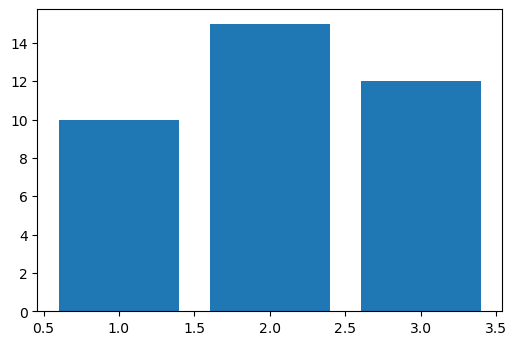

In [2]:
x = [1,2,3]
bars = [10,15,12]

f, ax = plt.subplots(dpi=100)
# when using plt.subplots, the canvas and renderer get created automatically 
ax.bar(x, bars);

### Export the figure to a numpy array 

Method 1 [src](https://matplotlib.org/3.1.1/gallery/user_interfaces/canvasagg.html)

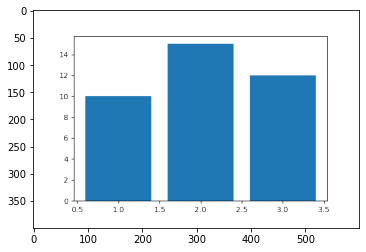

In [3]:
s, (width, height) = f.canvas.print_to_buffer()
rgba = np.frombuffer(s, np.uint8).reshape((height, width, 4))
plt.imshow(rgba, aspect='equal');

In [4]:
print(type(rgba))
print(rgba.shape)

<class 'numpy.ndarray'>
(400, 600, 4)


Method 2 [src](https://matplotlib.org/stable/gallery/user_interfaces/canvasagg.html)

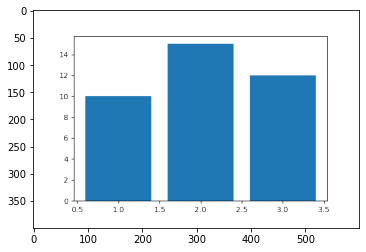

In [5]:
rgba = np.asarray(f.canvas.buffer_rgba())
plt.imshow(rgba);

In [6]:
print(type(rgba))
print(rgba.shape)

<class 'numpy.ndarray'>
(400, 600, 4)


### Remove the alpha channel in a numpy array (RGBA->RGB)

To remove the alpha channel it's enough to run: [src](https://stackoverflow.com/a/35902359)

In [7]:
rgb = rgba[:,:,:3]

The resulting chart is the same (our transparency is anyway white)

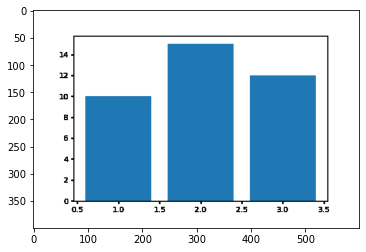

In [8]:
plt.imshow(rgb);

Both methods respect the `dpi` set when creating the figure using `plt.subplots`

### Warping images using skimage

Now we can warp the image: 

In [9]:
from skimage.transform import swirl

swirled = swirl(rgb, rotation=0, strength=30, radius=120)

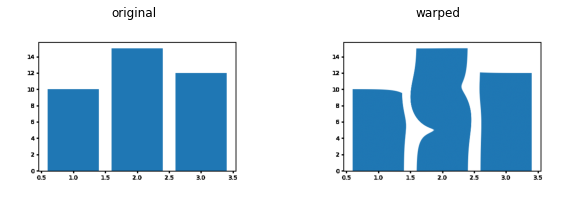

In [10]:
f, ax = plt.subplots(ncols = 2, figsize=(10,4))

ax[0].imshow(rgb, aspect='equal')
ax[0].set_title('original')

ax[1].imshow(swirled, aspect='equal')
ax[1].set_title('warped')

[a.axis('off') for a in ax];

More on skimage transforms: https://scikit-image.org/docs/stable/api/skimage.transform.html